# Group: Universe 🌟

# 🎬 MovieLens dataset

- `title`: the name of the movie  
- `genre`: the genre classification  
- `avg_rating`: average user rating (on a scale of 1 to 5)  
- `num_ratings`: total number of user ratings for the movie  

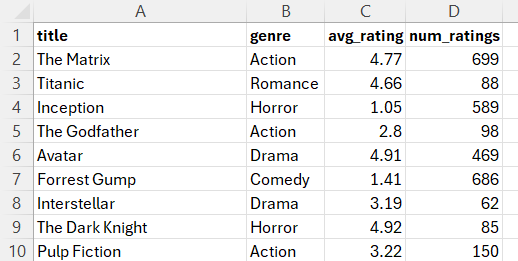

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data = files.upload()

Saving 03_MovieLens_Dataset.csv to 03_MovieLens_Dataset (3).csv


In [ ]:
df = pd.read_csv("03_MovieLens_Dataset.csv")

In [ ]:
df.head()

,title,genre,avg_rating,num_ratings
0,The Matrix,Action,4.77,699
1,Titanic,Romance,4.66,88
2,Inception,Horror,1.05,589
3,The Godfather,Action,2.80,98
4,Avatar,Drama,4.91,469


In [ ]:
df.tail()

,title,genre,avg_rating,num_ratings
495,The Lion King,Drama,1.62,655
496,Moana,Romance,1.83,506
497,Zootopia,Horror,3.52,664
498,Mulan,Romance,1.88,784
499,Aladdin,Comedy,1.08,747


**1. How many rows are there?**

In [ ]:
df.shape

(500, 4)

In [ ]:
num_rows = df.shape[0]
print(f"There are {num_rows} rows in the dataframe.")

There are 500 rows in the dataframe.


**2. What are the types of each column? Any missing values?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        500 non-null    object 
 1   genre        500 non-null    object 
 2   avg_rating   500 non-null    float64
 3   num_ratings  500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

,0
title,0
genre,0
avg_rating,0
num_ratings,0


In [ ]:
df.duplicated().sum()

np.int64(0)

**3. What is the average rating across all movies?**

In [ ]:
df['avg_rating'].mean()

np.float64(3.0730600000000003)

In [ ]:
average_rating = df['avg_rating'].mean().round(2)
print(f"The average rating across all movies is: {average_rating:.2f}")

The average rating across all movies is: 3.07


**4. How many distinct genres are present?**

In [ ]:
df['genre'].nunique()

5

=> There are 5 distinct genres

**5. Group by genre and compute average rating per genre.
Which genre has the highest average rating?**

In [ ]:
average_rating_per_genre = df.groupby('genre')['avg_rating'].mean()
print("Average rating per genre:")
print(average_rating_per_genre)

Average rating per genre:
genre
Action     3.134074
Comedy     2.873721
Drama      3.154343
Horror     3.132286
Romance    3.036667
Name: avg_rating, dtype: float64


In [ ]:
highest_genre = average_rating_per_genre.idxmax()
highest_genre

'Drama'

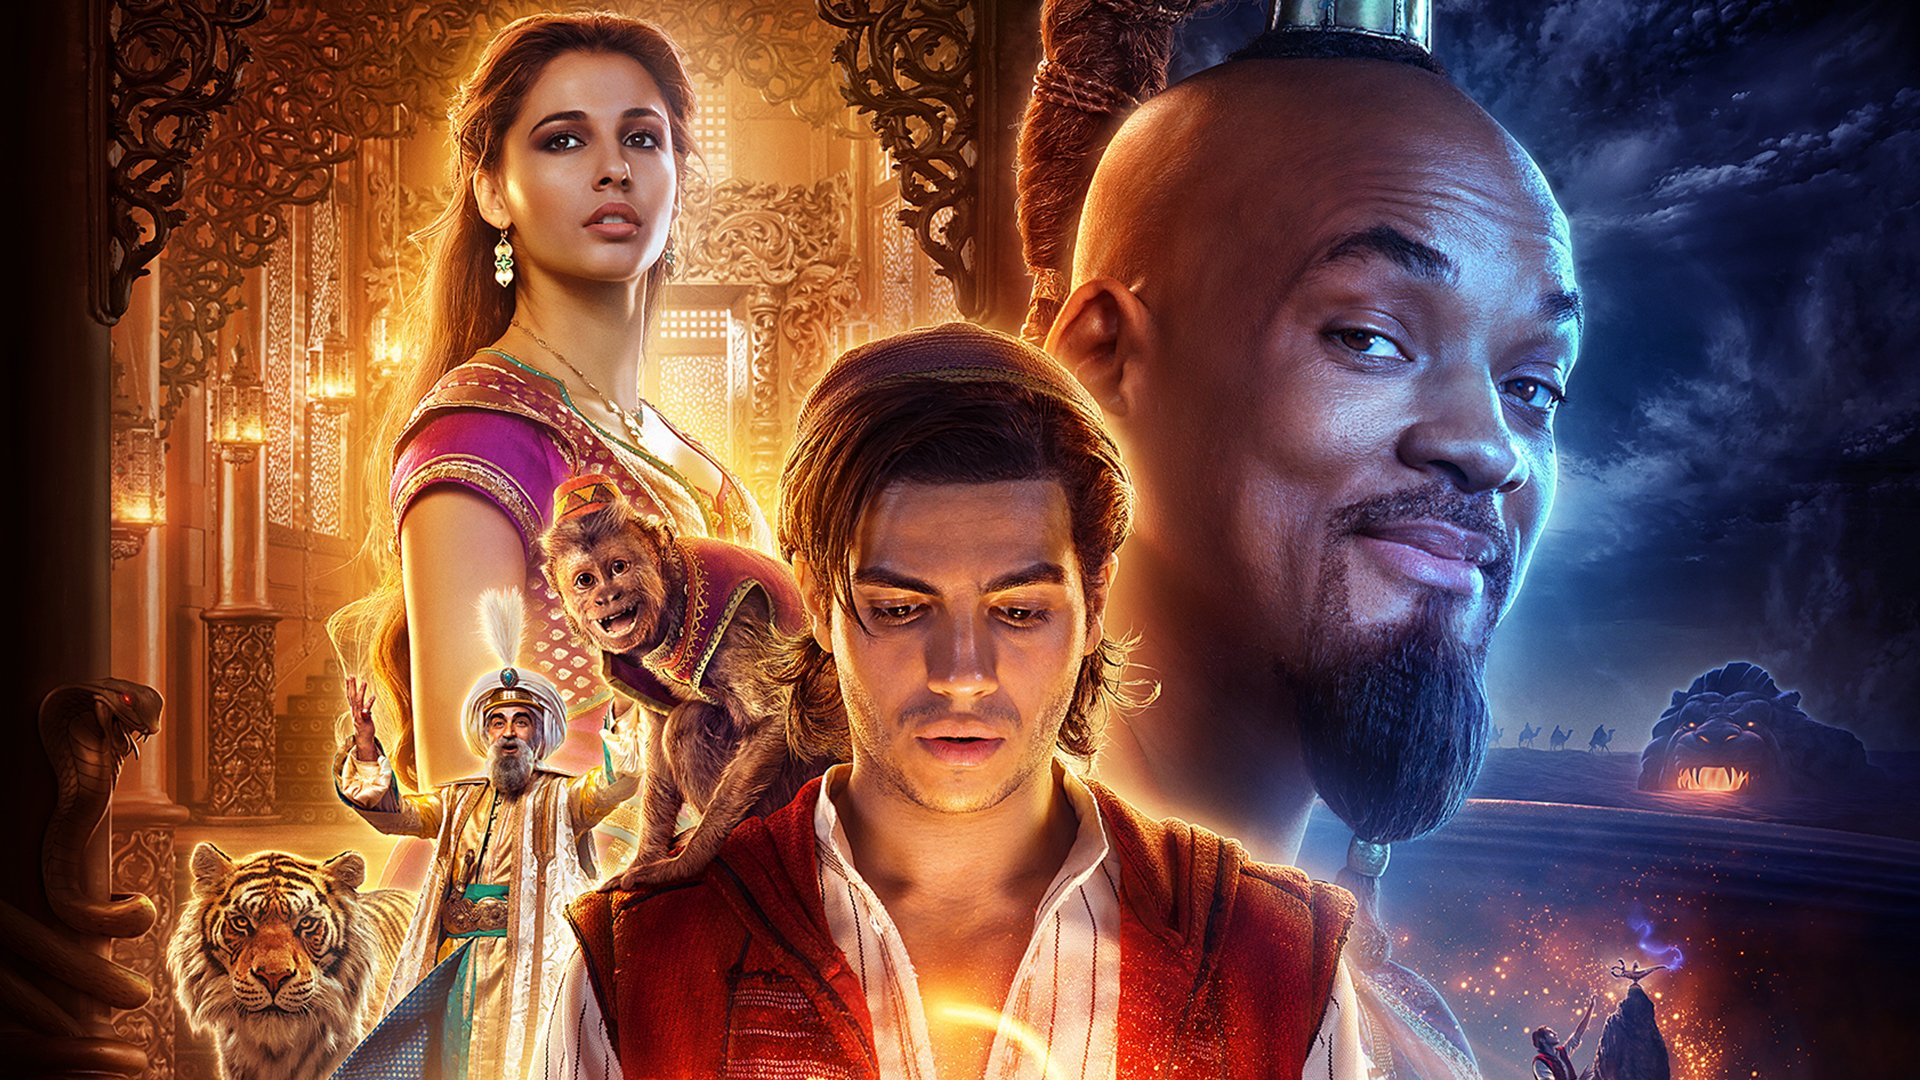

**6. Which genre has the most movies?**

In [ ]:
genre_counts = df['genre'].value_counts()
genre_counts

,count
genre,
Action,108
Horror,105
Romance,102
Drama,99
Comedy,86


In [ ]:
df['genre'].value_counts().idxmax()

'Action'

**7. Filter movies with num_ratings >= 100. How many such movies are there?**

In [ ]:
filter_movies = df[df['num_ratings'] >= 100]

In [ ]:
filter_movies.shape[0]

476

=> There are 476 movies with num_ratings >= 100.


**8. After filtering, group by genre again.
What is the highest-rated genre now?**

In [ ]:
filter_avg_rating = filter_movies.groupby('genre')['avg_rating'].mean().round(2)
filter_avg_rating

,avg_rating
genre,
Action,3.19
Comedy,2.86
Drama,3.17
Horror,3.09
Romance,3.04


In [ ]:
filter_avg_rating.idxmax()

'Action'

=> The highest-rated genre is **Action**

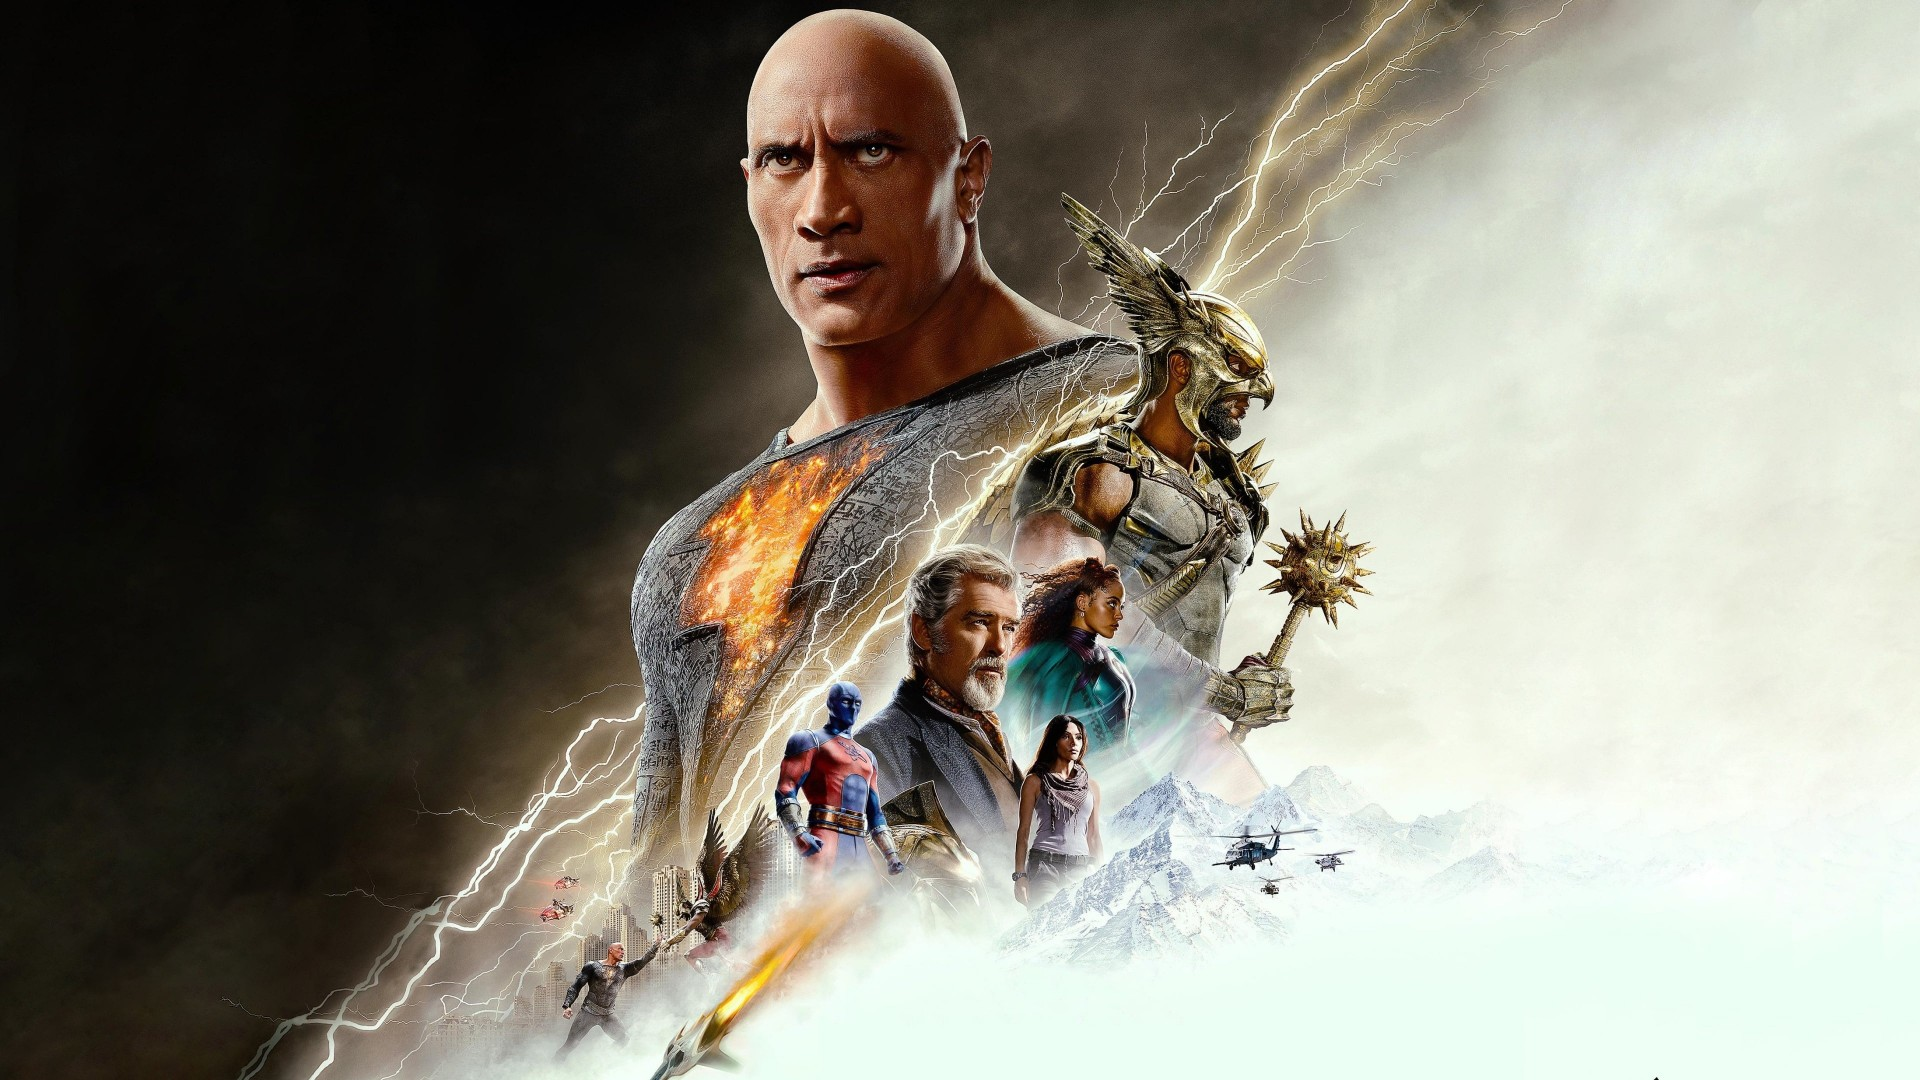

**9. Find all movies with avg_rating > 4.5 and num_ratings > 200.
How many are there?**

In [ ]:
highly_rated_popular = df[(df['avg_rating'] > 4.5) & (df['num_ratings'] > 200)]

In [ ]:
highly_rated_popular.shape[0]

48

=> There are 48 movies with avg_rating > 4.5 and num_ratings > 200.

**10. Use .loc[] to find genres that appear to have low average ratings but still > 300
reviews.
Which genres have consistently low popularity despite many reviews?**

In [ ]:
high_review = df.loc[df['num_ratings'] > 300]

In [ ]:
low_avg_high_review = high_review.groupby('genre')['avg_rating'].mean().round(2)
low_avg_high_review

,avg_rating
genre,
Action,3.25
Comedy,2.87
Drama,3.11
Horror,3.09
Romance,2.97


=> Comedy have low average rating but still more than 300 reviews.

**11. Write a function highly_rated(movie) that returns 'Yes' if avg_rating > 4.5 and 'No'
otherwise.
Apply this function to the dataset. How many movies are labeled ‘Yes’?**

In [ ]:
def highly_rated(movie_rating):
    """Returns 'Yes' if avg_rating > 4.5, otherwise 'No'."""
    if movie_rating > 4.5:
        return 'Yes'
    else:
        return 'No'

df['highly_rated'] = df['avg_rating'].apply(highly_rated)

num_yes = df['highly_rated'].value_counts()['Yes']
print(f"Number of movies labeled 'Yes': {num_yes}")

Number of movies labeled 'Yes': 57


**12. Using a for loop, print out the top-rated movie in each genre.**

In [ ]:
print("Top-rated movie in each genre:")
for genre in df['genre'].unique():
    top_movie = df[df['genre'] == genre].sort_values(by='avg_rating', ascending=False).iloc[0]
    print(f"Genre: {genre}, Movie: {top_movie['title']}, Rating: {top_movie['avg_rating']}")

Top-rated movie in each genre:
Genre: Action, Movie: The Godfather, Rating: 4.94
Genre: Romance, Movie: The Avengers, Rating: 4.9
Genre: Horror, Movie: Zootopia, Rating: 4.99
Genre: Drama, Movie: Inception, Rating: 4.95
Genre: Comedy, Movie: Titanic, Rating: 4.84


**13. Create a new column rating_level using if-else conditions: High if avg_rating >= 4.5. Medium if avg_rating >= 3 and < 4.5. Low if < 3. How many movies fall into each category?**

In [ ]:
def categorize_rating(rating):
    if rating >= 4.5:
        return 'High'
    elif rating >= 3:
        return 'Medium'
    else:
        return 'Low'

df['rating_level'] = df['avg_rating'].apply(categorize_rating)

rating_level_counts = df['rating_level'].value_counts()
print(rating_level_counts)

rating_level
Low       231
Medium    211
High       58
Name: count, dtype: int64


=> most movies have low and medium average rating

**14. Write a function recommend_movies(genre) that returns the top 3 highest-rated
movies from that genre with over 100 ratings.
Test your function with 'Drama' and 'Action'**

In [ ]:
def recommend_movies(genre):
    filter = df[(df['genre'] == genre) & (df['num_ratings'] > 100)]
    top_movies = filter.sort_values(by='avg_rating', ascending=False).head(3)
    return top_movies[['title', 'avg_rating', 'num_ratings']]

In [ ]:
recommend_movies('Drama')

,title,avg_rating,num_ratings
102,Inception,4.95,898
4,Avatar,4.91,469
324,Aladdin,4.83,348


In [ ]:
recommend_movies('Action')

,title,avg_rating,num_ratings
203,The Godfather,4.94,522
261,The Avengers,4.93,121
341,Finding Nemo,4.93,921


**15. Loop through each genre.
Print the average number of ratings (num_ratings) for each genre. Which genres have
the most active viewers?**

In [ ]:
genre_list = df['genre'].unique()
for genre in genre_list:
    avg_ratings = df[df['genre'] == genre]['num_ratings'].mean()
    print(f"{genre}: {avg_ratings:.2f}")

Action: 468.96
Romance: 519.07
Horror: 549.74
Drama: 552.43
Comedy: 558.00
